In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [10]:
def Model2_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, lambda_4, gamma_11, gamma_12, gamma_21, gamma_22, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    Q4 = 0
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    AQ4 = 0 
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_JC = 0
    Matches_JE = 0
    
    # (can add in arrivals of C1 and C2 separately if needed)
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_JC = 0
    Arrivals_JE = 0
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_JC = 0
    Abandonment_JE = 0
    
     
    # Initalise vector to store the time 
    Time_v = []
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*5)
    EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = -(np.log(1-np.random.uniform(0, 1))/lambda_4)
    EC[4] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        
        iteration += 1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        AQ4 += ((TNEXT-TNOW)*Q4)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        
        # Next event is arrival of a class 1 CE (Q1)
        if(ENEXT==0):
            
            # Increase CE arrivals by 1
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 2 CEs to match with first check these
            if(Q3 > 0):
                
                # Loop through each C2 CE and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (C2 CE)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If no matches yet and there are C2 EEs to match with         
            if(Q4 > 0 and m==0):
                
                # Loop through each C2 EE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_11)))
                
                # Joins queue 
                Q1 += 1
                
        # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        # Next event is arrival of a class 1 EE (Q2)
        elif(ENEXT==1):
            
            # Increase EE arrivals by 1
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q4 > 0):
                
                # Loop through each JE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_EE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If no matches yet and there are JC to match with         
            if(Q3 > 0 and m==0):
                
                # Loop through each JC and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with JC and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and JC matches by 
                        Matches_EE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (JC)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_12)))
                
                # Joins queue 
                Q2 += 1
                
        # Update EC to include next arrival time of EE
            EC[1]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_2)
        
        # Next event is arrival of a class 2 CE (Q3)
        elif(ENEXT==2):
            
            # Increase JC arrivals by 1
            Arrivals_JC += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 1 CEs to match with first check these
            if(Q1 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q1 (C1 CE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If no matches yet and there are C1 EEs to match with         
            if(Q2 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_EE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C2 CE (Q3)
                EC=np.insert(EC, (5+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_21)))
                
                # Joins queue 
                Q3 += 1
                
        # Update EC to include next arrival time of CE
            EC[2]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is arrival of a class 2 EE (Q4)
        elif(ENEXT==3):
            
            # Increase EE arrivals by 1
            Arrivals_JE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q2 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # JE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_JE += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 CE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If no matches yet and there are CEs to match with         
            if(Q1 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase JE and CE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived Q4 (JE)
                EC=np.insert(EC, (5+Q1+Q2+Q3+Q4), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_22)))
                
                # Joins queue 
                Q4 += 1
                
            # Update EC to include next arrival time of EE
            EC[3]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_4)
            
            
        # Next event is abandonment of C1 CE Q1:
        elif((ENEXT>4) and (ENEXT <= (4+Q1))):
            
            # Q1 decreases by 1 
            Q1 -= 1 
            
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of C1 EE (Q2)
        elif((ENEXT>4+Q1) and (ENEXT <= (4+Q1+Q2))):
            
            # Q2 decreases by 1 
            Q2 -= 1 
            
            # Abandonment increases by 1
            Abandonment_EE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of JC (Q3)
        elif((ENEXT>4+Q1+Q2) and (ENEXT <= (4+Q1+Q2+Q3))):
            
            # Q3 decreases by 1 
            Q3 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JC += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next abandonment of JE (Q4)
        elif((ENEXT>4+Q1+Q2+Q3) and (ENEXT <= (4+Q1+Q2+Q3+Q4))):
            
            # Q4 decreases by 1 
            Q4 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JE += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        
       
            
    T_Q = AQ1 + AQ2 + AQ3 + AQ4
    
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
        
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_JC > 0):
        JCMatchRate = Matches_JC/Arrivals_JC
        JCAbandonRate = Abandonment_JC/Arrivals_JC
    else:
        JCMatchRate = 0
        JCAbandonRate = 0
    if(Arrivals_JE > 0):
        JEMatchRate = Matches_JE/Arrivals_JE
        JEAbandonRate = Abandonment_JE/Arrivals_JE
    else:
        JEMatchRate = 0
        JEAbandonRate = 0
    if(Arrivals_CE +Arrivals_EE+Arrivals_JC + Arrivals_JE > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_JE + Matches_JC)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_JC + Abandonment_JE)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_AQ4 = AQ4/TERM
    Av_Q_Total= T_Q/TERM
        
    return Av_AQ1, Av_AQ2, Av_AQ3, Av_AQ4, Av_Q_Total, CEMatchRate, EEMatchRate, JCMatchRate, JEMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JCAbandonRate, JEAbandonRate, TotalAbandonRate


            
            
        
        
        
        
        
        
        
                


        
        
                
        
                


                
        
                


In [11]:
print(datetime. now())
lambda2 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]

CE_Match_rates = []
EE_Match_rates = []
JC_Match_rates = []
JE_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
JC_Abandon_rates = []
JE_Abandon_rates = []
JE_Match_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
JC_Queue_length = []
JE_Queue_length =[]
Total_Queue_length = []



for i in range(len(lambda2)):
    print(lambda2[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    JC_Rep_m_rate = []
    JE_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    JC_Rep_a_rate = []
    JE_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    JC_Rep_q_length = []
    JE_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(5):
        print(j)
        print(datetime. now())
        rep_results=Job_2type(0.75, 0.5, 1, lambda2[i], 1, 1, 0.1, 0.1, 0.05, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[5])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[6])
        JC_Rep_m_rate = np.append(JC_Rep_m_rate, rep_results[7])
        JE_Rep_m_rate = np.append(JE_Rep_m_rate, rep_results[8])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[9])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[10])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[11])
        JC_Rep_a_rate = np.append(JC_Rep_a_rate, rep_results[12])
        JE_Rep_a_rate = np.append(JE_Rep_a_rate, rep_results[13])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[14])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        JC_Rep_q_length = np.append(JC_Rep_q_length, rep_results[2])
        JE_Rep_q_length = np.append(JE_Rep_q_length, rep_results[3])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[4])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    JC_Match_rates = np.append(JC_Match_rates, np.average(JC_Rep_m_rate))
    JE_Match_rates = np.append(JE_Match_rates, np.average(JE_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    JC_Abandon_rates = np.append(JC_Abandon_rates, np.average(JC_Rep_a_rate))
    JE_Abandon_rates = np.append(JE_Abandon_rates, np.average(JE_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    JC_Queue_length = np.append(JC_Queue_length, np.average(JC_Rep_q_length))
    JE_Queue_length = np.append(JE_Queue_length, np.average(JE_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(JC_Match_rates)
    print(JE_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(JC_Abandon_rates)
    print(JE_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(JC_Queue_length)
    print(JE_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-17 15:46:26.205940
0
0
0
2023-08-17 15:46:26.209726


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-17 15:46:39.480730
2
2023-08-17 15:46:51.991010
3
2023-08-17 15:47:05.132071
4
2023-08-17 15:47:16.901345
[0.99992036]
[0.]
[0.82253472]
[0.18014638]
[0.66756832]
[7.96409449e-05]
[0.]
[0.17724535]
[0.81932132]
[0.33218118]
[0.00078266]
[0.]
[3.53312315]
[16.49144225]
[20.02534806]
0.2
1
0
2023-08-17 15:47:28.156714
1
2023-08-17 15:47:39.912790
2
2023-08-17 15:47:51.114466
3
2023-08-17 15:48:02.440107
4
2023-08-17 15:48:14.350994
[0.99992036 0.99934637]
[0.         0.99969945]
[0.82253472 0.82221476]
[0.18014638 0.37514571]
[0.66756832 0.74870967]
[7.96409449e-05 6.53629484e-04]
[0.         0.00030055]
[0.17724535 0.17772535]
[0.81932132 0.62436762]
[0.33218118 0.25111931]
[0.00078266 0.00580067]
[0.         0.00081851]
[3.53312315 3.54339895]
[16.49144225 12.46075307]
[20.02534806 16.0107712 ]
0.4
2
0
2023-08-17 15:48:25.772230
1
2023-08-17 15:48:37.419412
2
2023-08-17 15:48:49.032404
3
2023-08-17 15:49:00.364559
4
2023-08-17 15:49:11.698027
[0.99992036 0.99934637 0.99601775

1
2023-08-17 15:57:02.263863
2
2023-08-17 15:57:24.512788
3
2023-08-17 15:57:46.715623
4
2023-08-17 15:58:09.209141
[0.99992036 0.99934637 0.99601775 0.98574484 0.95896119 0.91915053
 0.87433467 0.83236093 0.79937063 0.77873027]
[0.         0.99969945 0.99673343 0.98760128 0.96244495 0.91876061
 0.86331863 0.80097867 0.73686033 0.67202963]
[0.82253472 0.82221476 0.82622742 0.84824519 0.88129156 0.92251403
 0.95414928 0.97526529 0.98765731 0.99484999]
[0.18014638 0.37514571 0.56390402 0.73354411 0.85143976 0.92221459
 0.96188746 0.98133413 0.99119164 0.99641712]
[0.66756832 0.74870967 0.81877081 0.87791055 0.91102674 0.92065088
 0.91096042 0.88862819 0.86024318 0.8289843 ]
[7.96409449e-05 6.53629484e-04 3.98225047e-03 1.42551566e-02
 4.10320550e-02 8.08094068e-02 1.25625168e-01 1.67499064e-01
 2.00582825e-01 2.21196763e-01]
[0.00000000e+00 3.00553229e-04 3.26656917e-03 1.23987235e-02
 3.75467310e-02 8.11663719e-02 1.36614746e-01 1.98897764e-01
 2.63039884e-01 3.27855857e-01]
[0.17724535

1
2023-08-17 16:06:52.866109
2
2023-08-17 16:07:33.974119
3
2023-08-17 16:08:15.224429
4
2023-08-17 16:08:56.658101
[0.99992036 0.99934637 0.99601775 0.98574484 0.95896119 0.91915053
 0.87433467 0.83236093 0.79937063 0.77873027 0.76460899 0.75749163
 0.75369579 0.75140052]
[0.         0.99969945 0.99673343 0.98760128 0.96244495 0.91876061
 0.86331863 0.80097867 0.73686033 0.67202963 0.61359891 0.56767151
 0.51937593 0.48021376]
[0.82253472 0.82221476 0.82622742 0.84824519 0.88129156 0.92251403
 0.95414928 0.97526529 0.98765731 0.99484999 0.99751659 0.99881618
 0.99951899 0.99979982]
[0.18014638 0.37514571 0.56390402 0.73354411 0.85143976 0.92221459
 0.96188746 0.98133413 0.99119164 0.99641712 0.99846211 0.99930916
 0.99978681 0.9999201 ]
[0.66756832 0.74870967 0.81877081 0.87791055 0.91102674 0.92065088
 0.91096042 0.88862819 0.86024318 0.8289843  0.79732106 0.77040417
 0.74080523 0.71421977]
[7.96409449e-05 6.53629484e-04 3.98225047e-03 1.42551566e-02
 4.10320550e-02 8.08094068e-02 1.

In [10]:
# Results 
lambda2 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]
CE_Match_rates = [0.99992036, 0.99934637, 0.99601775, 0.98574484, 0.95896119, 0.91915053, 0.87433467, 0.83236093, 0.79937063, 0.77873027, 0.76460899, 0.75749163, 0.75369579, 0.75140052, 0.75054838, 0.75152909]
EE_Match_rates = [0.0, 0.99969945, 0.99673343, 0.98760128, 0.96244495, 0.91876061, 0.86331863, 0.80097867, 0.73686033, 0.67202963, 0.61359891, 0.56767151, 0.51937593, 0.48021376, 0.44727476, 0.4165207]
JC_Match_rates = [0.82253472, 0.82221476, 0.82622742, 0.84824519, 0.88129156, 0.92251403, 0.95414928, 0.97526529, 0.98765731, 0.99484999, 0.99751659, 0.99881618, 0.99951899, 0.99979982, 0.99996663, 0.99996676]
JE_Match_rates = [0.18014638, 0.37514571, 0.56390402, 0.73354411, 0.85143976, 0.92221459, 0.96188746, 0.98133413, 0.99119164, 0.99641712, 0.99846211, 0.99930916, 0.99978681, 0.9999201, 0.99991381, 0.99995991]
Total_Match_rates = [0.66756832, 0.74870967, 0.81877081, 0.87791055, 0.91102674, 0.92065088, 0.91096042, 0.88862819, 0.86024318, 0.8289843, 0.79732106, 0.77040417, 0.74080523, 0.71421977, 0.69049474, 0.6669861]
CE_Abandon_rates = [7.96409449e-05, 6.53629484e-04, 3.98225047e-03, 1.42551566e-02, 4.10320550e-02, 8.08094068e-02, 1.25625168e-01, 1.67499064e-01, 2.00582825e-01, 2.21196763e-01, 2.35324210e-01, 2.42495070e-01, 2.46190906e-01, 2.48486215e-01, 2.49344994e-01, 2.48397502e-01]
EE_Abandon_rates = [0.00000000e+00, 3.00553229e-04, 3.26656917e-03, 1.23987235e-02, 3.75467310e-02, 8.11663719e-02, 1.36614746e-01, 1.98897764e-01, 2.63039884e-01, 3.27855857e-01, 3.86277908e-01, 4.32198001e-01, 4.80496201e-01, 5.19588648e-01, 5.52560738e-01, 5.83207789e-01]
JC_Abandon_rates = [1.77245354e-01, 1.77725348e-01, 1.73692461e-01, 1.51608012e-01, 1.18615133e-01, 7.74526668e-02, 4.58373582e-02, 2.47347068e-02, 1.23426911e-02, 5.14331655e-03, 2.48341108e-03, 1.17716610e-03, 4.81011284e-04, 2.00178167e-04, 3.33657315e-05, 3.32393043e-05]
JE_Abandon_rates = [8.19321324e-01, 6.24367615e-01, 4.35842947e-01, 2.66295808e-01, 1.48493073e-01, 7.77586590e-02, 3.80925969e-02, 1.86658672e-02, 8.80835822e-03, 3.58287831e-03, 1.53788974e-03, 6.90843888e-04, 2.13194814e-04, 7.99009659e-05, 8.61910748e-05, 4.00879954e-05]
Total_Abandon_rates = [0.33218118, 0.25111931, 0.18113106, 0.12200427, 0.08892754, 0.07930574, 0.08900303, 0.11130058, 0.13971193, 0.17095619, 0.20261617, 0.22953688, 0.25911699, 0.28566828, 0.30940751, 0.33286598]
CE_Queue_length = [7.82655394e-04, 5.80067003e-03, 3.97309575e-02, 1.39347257e-01, 4.07004846e-01, 8.17291877e-01, 1.24380459e+00, 1.65640117e+00, 1.99718651e+00, 2.21873300e+00, 2.35717589e+00, 2.39618873e+00, 2.47612802e+00, 2.47025754e+00, 2.51623225e+00, 2.48794434e+00]
EE_Queue_length = [0.0, 8.18510079e-04, 1.23990275e-02, 7.45450195e-02, 3.09693872e-01, 8.15679747e-01, 1.63793192e+00, 2.78547798e+00, 4.20377307e+00, 5.90077081e+00, 7.74014854e+00, 9.50924999e+00, 1.15616634e+01, 1.35010816e+01, 1.54268923e+01, 1.74645547e+01]
JC_Queue_length = [3.53312315e+00, 3.54339895e+00, 3.45356478e+00, 3.02691285e+00, 2.36953987e+00, 1.54760291e+00, 8.80775681e-01, 4.84390628e-01, 2.43918358e-01, 1.03473336e-01, 4.99495309e-02, 2.22674533e-02, 8.66606111e-03, 4.48242057e-03, 1.50243740e-03, 6.33350039e-04]
JE_Queue_length = [1.64914423e+01, 1.24607531e+01, 8.73111423e+00, 5.32990664e+00, 2.92792401e+00, 1.53786335e+00, 7.63561866e-01, 3.74747065e-01, 1.79817064e-01, 7.37998048e-02, 3.13553838e-02, 1.29144601e-02, 4.68063098e-03, 2.42883414e-03, 6.20896101e-04, 2.64890253e-04]
Total_Queue_length = [20.02534806, 16.0107712, 12.236809, 8.57071176, 6.0141626, 4.71843788, 4.52607405, 5.30101684, 6.624695, 8.29677695, 10.17862935, 11.94062063, 14.05113815, 15.97825038, 17.94524792, 19.95339731]


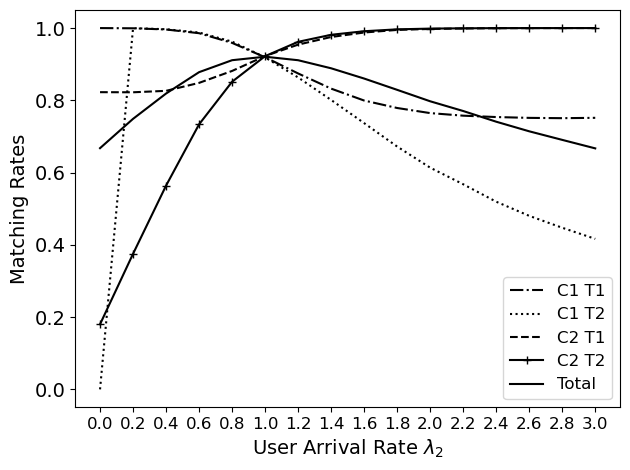

In [11]:
plt.xlabel(r'User Arrival Rate $\lambda_2$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(lambda2, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda2, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda2, JC_Match_rates,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda2, JE_Match_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda2, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda2, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp20_Match_long.png')
plt.show()

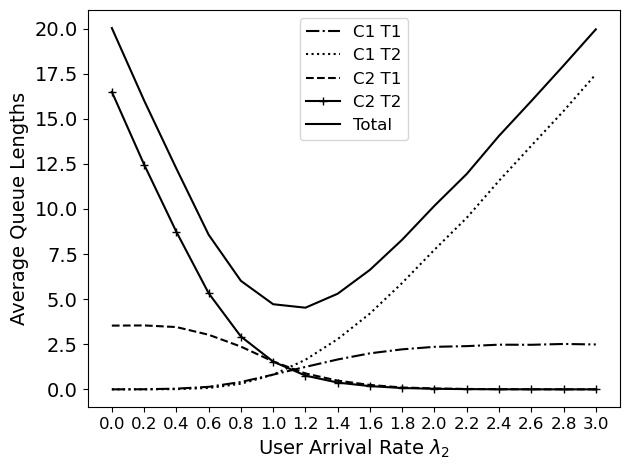

In [12]:
plt.xlabel(r'User Arrival Rate $\lambda_2$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(lambda2, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda2, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda2, JC_Queue_length,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda2, JE_Queue_length,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda2, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda2, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp20_Queue_long.png')
plt.show()



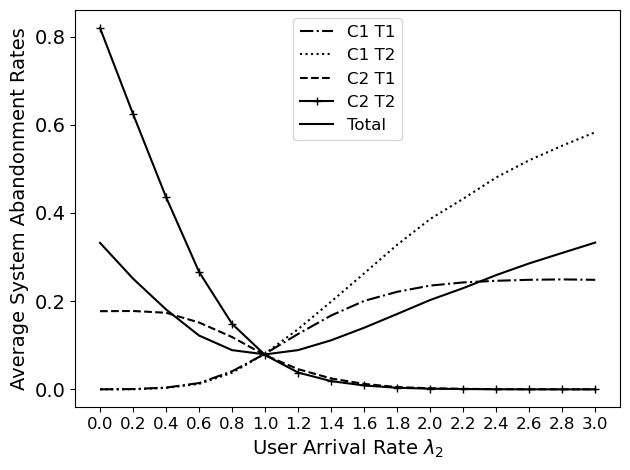

In [13]:
plt.xlabel(r'User Arrival Rate $\lambda_2$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(lambda2, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda2, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda2, JC_Abandon_rates, linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(lambda2, JE_Abandon_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(lambda2, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda2, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp20_Abandon_long.png')
plt.show()



